In [65]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import ConnectionPatch
import seaborn as sns
import os
import pandas as pd

In [66]:
def plot_via_MA(data: np.ndarray, window_size: int):
    """
    Function: smooth the data pts via moving average.
    :param window_size: window size of moving average.
    :param data: ndarray in shape [x, ]
    :return: data
    """
    data = pd.DataFrame(data.flatten()).rolling(window_size).mean()
    return data

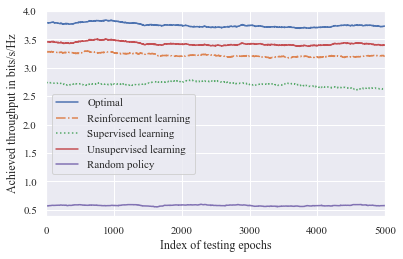

In [74]:
window_size = 3000
optimal = plot_via_MA(np.load(os.path.join('./results/unsupervised_learning', 'optimal.npy')), window_size)[window_size-1:]
random_res = plot_via_MA(np.load(os.path.join('./results/unsupervised_learning', 'random_res.npy')), window_size)[window_size-1:]
dnn_res = plot_via_MA(np.load(os.path.join('./results/unsupervised_learning', 'dnn_res.npy')), window_size)[window_size-1:]
dqn_res = plot_via_MA(np.load(os.path.join('./results/dqn', 'dqn_res_no_actions.npy')), window_size)[window_size-1:]
dnn_supervised_learning = plot_via_MA(np.load(os.path.join('./results/supervised_learning', 'dnn_res.npy')), window_size)[window_size-1:]
episode_idx = np.arange(0, dnn_res.shape[0], step=1)
length = 1000 * 5
sns.set()
config = {
    "font.family":'serif',
    "font.size": 20,
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)
fig, ax = plt.subplots(1, 1)
ax.plot(episode_idx[:length], optimal[0][:length], label="Optimal", linestyle='-')
ax.plot(episode_idx[:length], dqn_res[0][:length], label="Reinforcement learning", linestyle='-.')
ax.plot(episode_idx[:length], dnn_supervised_learning[0][:length], linestyle=':', label="Supervised learning")
ax.plot(episode_idx[:length], dnn_res[0][:length], label="Unsupervised learning", linestyle='-')
ax.plot(episode_idx[:length], random_res[0][:length], label="Random policy", linestyle='-')
ax.grid(True)
ax.set_ylabel("Achieved throughput in bits/s/Hz")
ax.set_xlabel("Index of testing epochs")
ax.legend(loc='center left', bbox_to_anchor=(0, 0.4))
ax.set_xlim((0, length))
plt.gcf().set_tight_layout(True)
plt.savefig('./figs/learning_results.pdf')
plt.show()


In [30]:
#
optimal = plot_via_MA(np.load(os.path.join('./results/unsupervised_learning', 'optimal.npy')), window_size)[window_size-1:]
dqn_res_with_actions = plot_via_MA(np.load(os.path.join('./results/dqn', 'dqn_res.npy')), window_size)[window_size-1:]
dqn_res = plot_via_MA(np.load(os.path.join('./results/dqn', 'dqn_res_no_actions.npy')), window_size)[window_size-1:]
episode_idx = np.arange(0, dnn_res.shape[0], step=1)
length = 1000 * 5
sns.set()
config = {
    "font.family":'serif',
    "font.size": 20,
    "font.serif": ['Times New Roman'],
}
rcParams.update(config)
